Zadanie 1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

In [5]:
dane = pd.read_csv(r"C:\Users\Rafal\OneDrive\Dokumenty\GitHub\Komputerowa-analiza-szeregow-czasowych\dane1.txt", delim_whitespace=True, header=None)

In [6]:
objasniajaca = dane[0]
objasniana = dane[1]

In [13]:
def func(a,b,x):
    return a*x+b
parametry, _ = curve_fit(func, objasniajaca, objasniana)

In [17]:
b,a = parametry

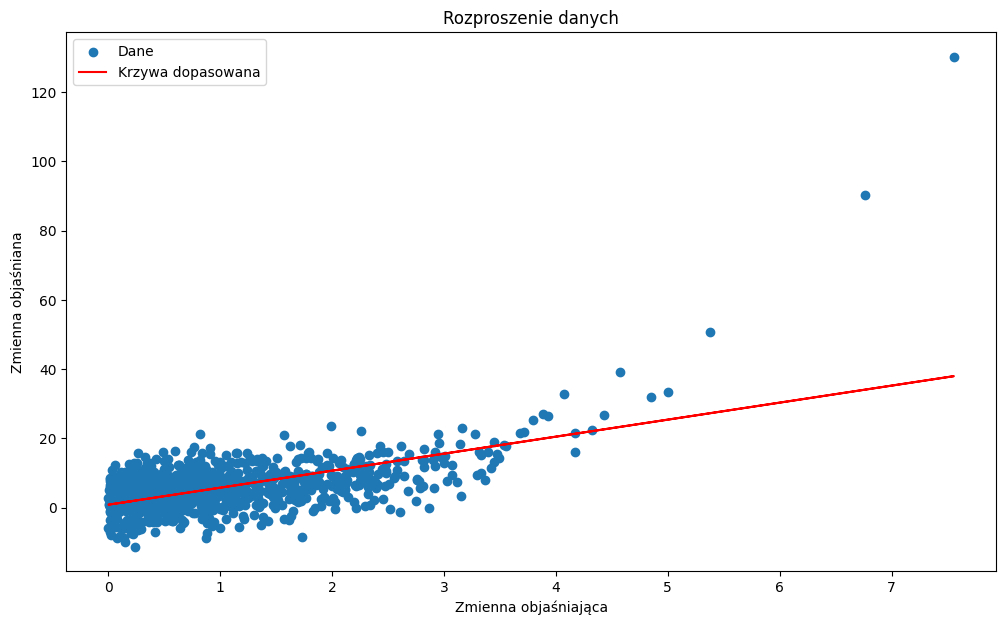

In [21]:
plt.figure(figsize=(12,7))
plt.scatter(objasniajaca, objasniana, label='Dane')
plt.plot(objasniajaca, func(a,b,objasniajaca), color="r", label="Krzywa dopasowana")
plt.title('Rozproszenie danych')
plt.xlabel('Zmienna objaśniająca')
plt.ylabel('Zmienna objaśniana')
plt.legend()
plt.show()

Zadanie 3

In [9]:
dane2 = np.loadtxt(r'C:\Users\Rafal\OneDrive\Dokumenty\GitHub\Komputerowa-analiza-szeregow-czasowych\dane2.txt')
dane3 = np.loadtxt(r'C:\Users\Rafal\OneDrive\Dokumenty\GitHub\Komputerowa-analiza-szeregow-czasowych\dane3.txt')

In [6]:
def prosta_sr_ruchoma(X,podstawa):
    T= []
    start,stop,krok = int((podstawa-1)/2),int(len(X)-(podstawa-1)/2),int(len(X)-(podstawa-1))
    ranga = np.linspace(start,stop,krok)
    for t in ranga:
        T.append((1/podstawa)*sum(X[int(t)-1-start:int(t)-1+start]))
    return T

In [11]:
def prosta_regresji(x,y):
    b_1 = np.sum(x*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
    b_0 = np.mean(y) - b_1 * np.mean(x)
    return b_0, b_1

In [12]:
b0, b1 = prosta_regresji(dane2, dane3)

In [18]:
xs = np.linspace(-1,10,1000)

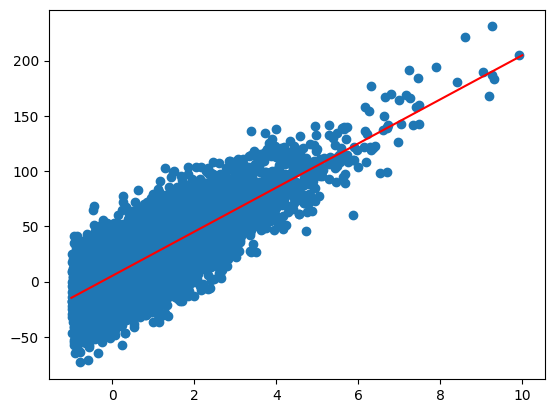

In [19]:
plt.scatter(dane2, dane3)
plt.plot(xs, xs * b1 + b0, color="r")
plt.show()

In [25]:
dane2_wygladzone, dane3_wygladzone = prosta_sr_ruchoma(dane2, 25), prosta_sr_ruchoma(dane3, 25)

In [26]:
b01, b11 = prosta_regresji(dane2_wygladzone, dane3_wygladzone)

In [32]:
xs2 = np.linspace(-0.5,2.5,1000)

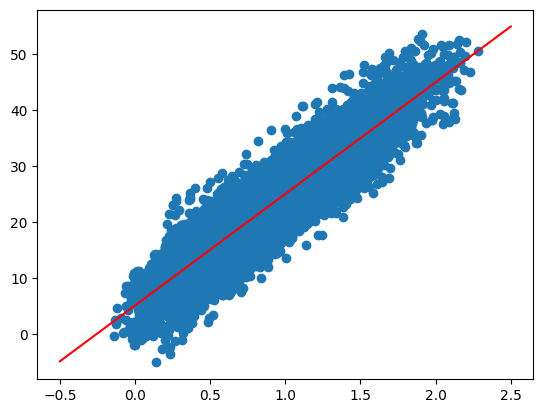

In [33]:
plt.scatter(dane2_wygladzone, dane3_wygladzone)
plt.plot(xs2, b11*xs2 + b01, color="r")
plt.show()

Zadanie 4

In [90]:
dane4 = pd.read_csv(r"C:\Users\Rafal\OneDrive\Dokumenty\GitHub\Komputerowa-analiza-szeregow-czasowych\dane4.txt", delim_whitespace=True, header=None)

In [91]:
objasniajaca_4 = dane4[0]
objasniana_4 = dane4[1]

In [92]:
b02, b12 = prosta_regresji(objasniajaca_4, objasniana_4)
xs = np.linspace(-10,10,1000)
y_reg = b12*xs + b02

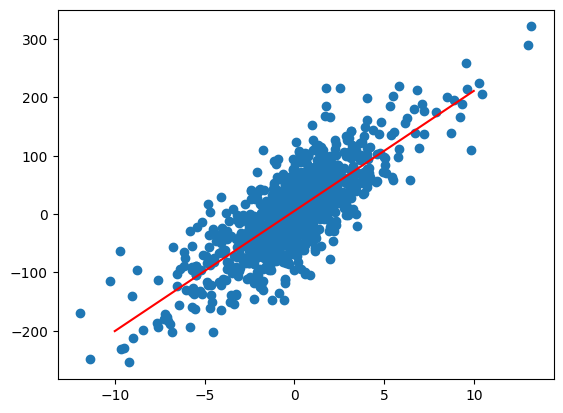

In [93]:
plt.scatter(objasniajaca_4, objasniana_4)
plt.plot(xs, y_reg, color="r")
plt.show()

In [99]:
e = objasniana_4 - (b12 * objasniajaca_4 + b02)

In [100]:
def variance(x):
    return 1/len(x) * np.sum((x - np.mean(x))**2)

In [101]:
def se_residuum(x):
    n = len(x)
    return np.sqrt(variance(x)) * np.sqrt(1 - (1/n + (x - np.mean(x))**2/np.sum((x-np.mean(x))**2)))

In [97]:
e_standarized = e/se_residuum(objasniajaca_4)

In [102]:
def delete_outliers(e,x,y):
    e_std = e / np.std(e)
    x_nowe, y_nowe = [], []
    for i in range(len(e_std)):
        if np.abs(e_std[i]) < 2:
            x_nowe.append(x[i])
            y_nowe.append(y[i])
    return x_nowe, y_nowe

In [103]:
x_no_outliers, y_no_outliers = delete_outliers(e, objasniajaca_4, objasniana_4)

In [104]:
b03, b13 = prosta_regresji(x_no_outliers, y_no_outliers)

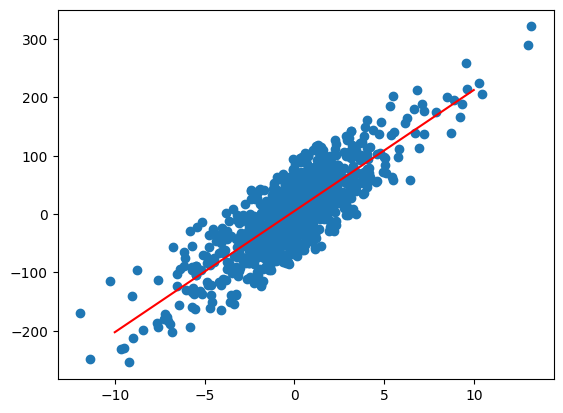

In [105]:
plt.scatter(x_no_outliers, y_no_outliers)
plt.plot(xs, b13 * xs + b03, color="r")
plt.show()

Zadanie 5

In [113]:
x_990 = objasniajaca_4[:991]
x_991 = objasniajaca_4[991:]
y_990 = objasniana_4[:991]
y_991 = objasniana_4[991:]

In [114]:
b05, b15 = prosta_regresji(x_990, y_990)

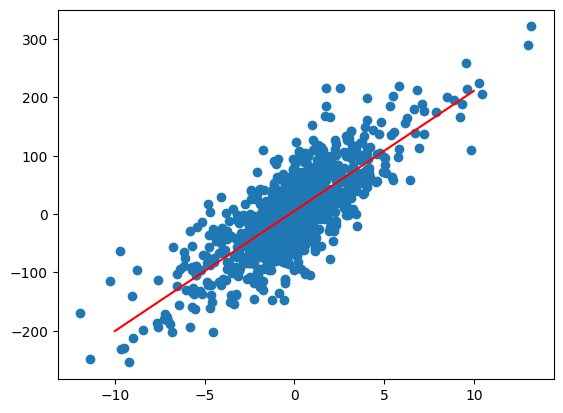

In [115]:
plt.scatter(x_990, y_990)
plt.plot(xs, xs*b15+ b05, color="r")
plt.show()

In [116]:
y_pred = b15 * x_991 + b05

In [117]:
errors = y_991 - y_pred

Zadanie 6

In [134]:
dane6 = pd.read_csv(r'C:\Users\Rafal\OneDrive\Dokumenty\GitHub\Komputerowa-analiza-szeregow-czasowych\dane6.txt', delim_whitespace=True, header=None)

In [135]:
x6 = dane6[0]
y6 = dane6[1]

In [136]:
y6_log = np.log(y6)

In [137]:
b06, b16 = prosta_regresji(x6, y6_log)

In [138]:
y6_pred_log = b16 * x6 + b06

In [139]:
y6_pred = np.exp(y6_pred_log)

In [140]:
x6 = sorted(y6)

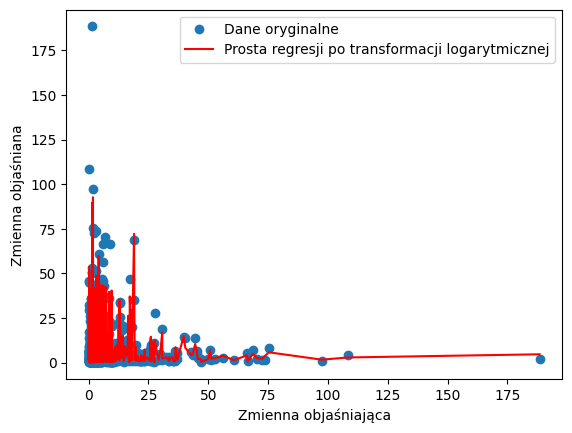

In [141]:

plt.scatter(x6, y6, label='Dane oryginalne')
plt.plot(x6, y6_pred, color='red', label='Prosta regresji po transformacji logarytmicznej')
plt.xlabel('Zmienna objaśniająca')
plt.ylabel('Zmienna objaśniana')
plt.legend()
plt.show()